In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

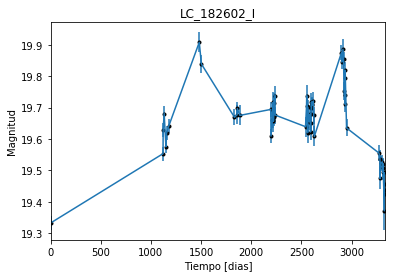

In [2]:
data = np.genfromtxt('LC_182602_I.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_182602_I')
plt.savefig("LC_182602_I.pdf")

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

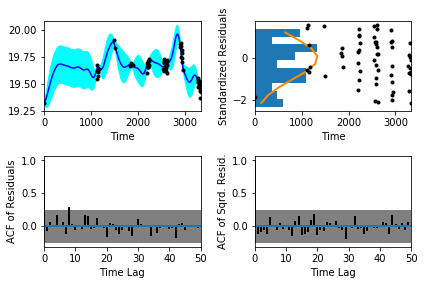

In [5]:
sample.assess_fit()

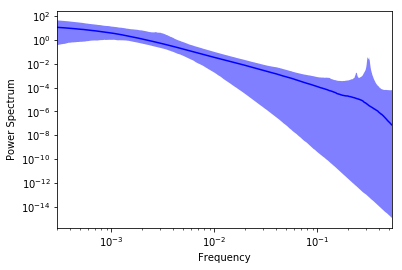

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

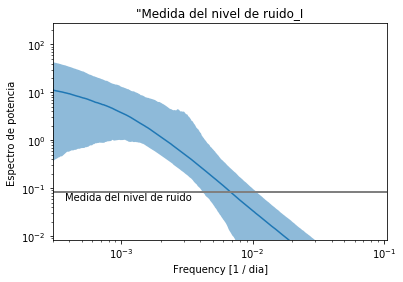

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_182602_I')
plt.title('"Medida del nivel de ruido_I')
plt.savefig("Medida del nivel de ruido_I.pdf")

Text(0.5,1,'Prediccion , valor esperado LC_182602_I')

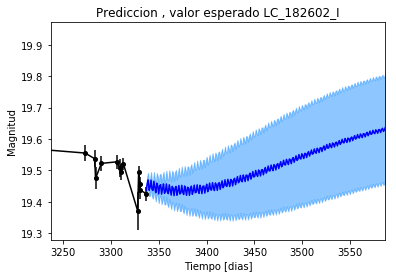

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_182602_I')

Text(0.5,1,'Prediccion, Caminos simulados  LC_182602_I')

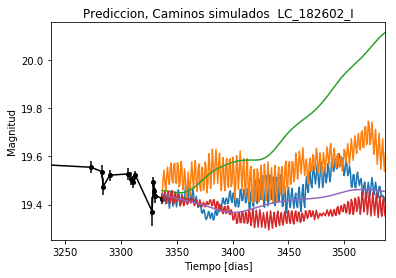

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados  LC_182602_I')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


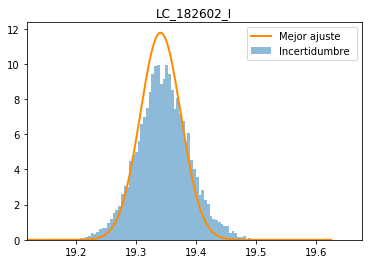

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_182602_I')
plt.savefig("Mejor_ajuste_LC_182602_I.pdf")

Text(0.5,1,'Interpolacion, camino simulado LC_182602_I')

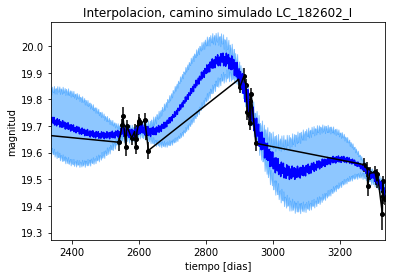

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_182602_I')

Text(0.5,1,'Interpolacion, camino simulado LC_182602_I')

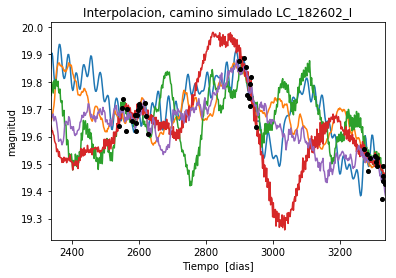

In [13]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_182602_I')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 224.586403602
Median: 0.00558976898014
Standard deviation: 0.183661974975
68% credibility interval: [ 0.00071669  0.10325294]
95% credibility interval: [  3.48961022e-04   7.62834401e-01]
99% credibility interval: [  3.04723189e-04   9.99378908e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 249.483988804
Median: 0.00271746326246
Standard deviation: 0.0717966163176
68% credibility interval: [ 0.00054685  0.02492134]
95% credibility interval: [ 0.00032866  0.23157788]
99% credibility interval: [  3.03342153e-04   4.72811916e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 742.652660646
Median: 0.0790197649918
Standard

In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 153.796597996
Median: 119.52573807
Standard deviation: 3.34389441551
68% credibility interval: [ 117.22525615  124.57276633]
95% credibility interval: [ 114.79803013  126.61020167]
99% credibility interval: [ 112.8724454   127.56868033]


In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 1100.39930164
Median: 0.903152814565
Standard deviation: 2.43215325099
68% credibility interval: [ 0.08896921  4.35147468]
95% credibility interval: [ 0.02201924  8.4694945 ]
99% credibility interval: [  1.17166295e-02   1.19216173e+01]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 317.161950948
Median: 3.81836309958
Standard deviation: 10.7120536298
68% credibility interval: [  0.21583607  18.67539399]
95% credibility interval: [  8.

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 17782.548743
Median: 1.39613002534e-26
Standard deviation: 1.87670220517e+60
68% credibility interval: [  5.18993674e-68   9.94809012e+00]
95% credibility interval: [  2.74833428e-110   7.80287777e+040]
99% credibility interval: [  2.92110194e-145   4.34290373e+055]


In [19]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 1019.139283
Median: 19.613290871
Standard deviation: 0.0804087912061
68% credibility interval: [ 19.53391073  19.67887754]
95% credibility interval: [ 19.43094544  19.75127482]
99% credibility interval: [ 19.35135095  19.8219406 ]


In [20]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 103.014561986
Median: 0.300794501354
Standard deviation: 0.271216293198
68% credibility interval: [ 0.          0.67620908]
95% credibility interval: [ 0.          0.93941756]
99% credibility interval: [ 0.          1.04973879]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 103.014561986
Median: 0.300794501354
Standard deviation: 0.271216293198
68% credibility interval: [ 0.          0.67620908]
95% credibility interval: [ 0.          0.93941756]
99% credibility interval: [ 0.          1.04973879]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 219.287770759
Median: 0.0
Standard deviation: 0.00069687698012
68% credi

In [21]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 153.796597996
Median: 119.52573807
Standard deviation: 3.34389441551
68% credibility interval: [ 117.22525615  124.57276633]
95% credibility interval: [ 114.79803013  126.61020167]
99% credibility interval: [ 112.8724454   127.56868033]


In [22]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 2252.21684982
Median: 0.0276025115539
Standard deviation: 0.0270429246155
68% credibility interval: [ 0.01733442  0.04539533]
95% credibility interval: [ 0.01203496  0.08363436]
99% credibility interval: [ 0.00956246  0.13795754]


In [23]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 166.713867868
Median: 1.21852846141
Standard deviation: 0.285481215657
68% credibility interval: [ 0.95153612  1.55387343]
95% credibility interval: [ 0.76402275  1.82787625]
99% credibility interval: [ 0.65651029  1.94552123]


In [24]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 238.565764603
Median: 0.0048606472337
Standard deviation: 0.326680475881
68% credibility interval: [  9.39582735e-06   2.14188387e-01]
95% credibility interval: [  5.62568926e-43   1.15595519e+00]
99% credibility interval: [  4.20512243e-59   2.11810258e+00]


In [25]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 224.586403602
Median: (-0.0351215543265-1.83843768797j)
Standard deviation: 2.05806690254
68% credibility interval: [-0.64875738-4.40956121j -0.00450308-6.69560017j]
95% credibility interval: [ -4.79302990e+00+0.j          -2.19258677e-03-0.03354522j]
99% credibility interval: [ -6.27928287e+00+0.j         -1.91463227e-03-0.0004075j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 249.483988804
Median: (-0.0170743252435+2.01985896946j)
Standard deviation: 1.76280059585
68% credibility interval: [-0.15658539+2.41990594j -0.00343598+0.j        ]
95% credibility interval: [-1.45504671+3.0482966j -0.00206505+0.j       ]
99% credibility interval: [ -2.97076488e+00+4.16083244j  -1.90595496e-03+0.j        ]
Posterior summary 